# Daily Forecast by John Foxworthy

Trying to predict the next price is a difficult task.  The properties of a single time series of data can vary differently, rhyme or just be random.  Below is a brief summary followed by an implementation.

The time series model we use has a methodology that breaks down a dataset into several components and each pattern type is represented in an additive manner.  The first component is the trend function that values changes in the time series that do not repeat over time, . . . while the second component is the seasonality function that values changes in the time series that does repeat over time such as weekly, monthly or yearly.  Lastly, uneven short periods such as days that affect the time series like holidays and an error term for distinct changes not in the model.  Ideally the errors should follow the parametric assumption of a normal distribution as the set of residuals, very small compared to overall time series, will over and undershoot by canceling each other out over time.    Altogether, this is a type of generalized additive model with fast curve fitting non – linear data that can be irregularly spaced. 

Further detail on the model, has been left out on purpose, to facilitate discussion.   


In [46]:
# Data Science Analytics Libraries
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

# Data Visualization Libaries 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Remove annoying warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

The Euro currency exchanged to the US Dollar is one of the most active currency pairs in the foreigh exchange market.  Unlike most currency pairs, the EUR /USD is quoted in U.S. Dollars as a single Euro unit is expressed in U.S. Dollars.  In currency pairs, the currency at the bottom, the denomintor, (or the currency on the right) is the quoted currency that buyers and sellers, bid and ask every second of the day, since the foreign exchange market does not close.  For other currency pairs, our output would need to be flipped, as a reciprocal, to express a value in U.S. Dollars like USD / JPY.  

In [47]:
df = pd.read_csv('/Users/lacivert/fx/d/DEXUSEU.csv')

df = pd.DataFrame(df)

list(df.columns.values)

['DATE', 'DEXUSEU']

In [48]:
df.dtypes

DATE        object
DEXUSEU    float64
dtype: object

In [49]:
# convert DATE column to datetime
df['DATE'] = pd.DatetimeIndex(df['DATE'])
df.dtypes

DATE       datetime64[ns]
DEXUSEU           float64
dtype: object

In [50]:
df.head(3)

,DATE,DEXUSEU
0,1999-01-04,1.1812
1,1999-01-05,1.1760
2,1999-01-06,1.1636


In [51]:
df.tail(3)

,DATE,DEXUSEU
5132,2019-06-12,1.1310
5133,2019-06-13,1.1275
5134,2019-06-14,1.1217


In [52]:
# rename to fit model, ds is the datestamp of the forecasted value and y is the observed value
df = df.rename(columns={'DATE': 'ds',
                        'DEXUSEU': 'y'})

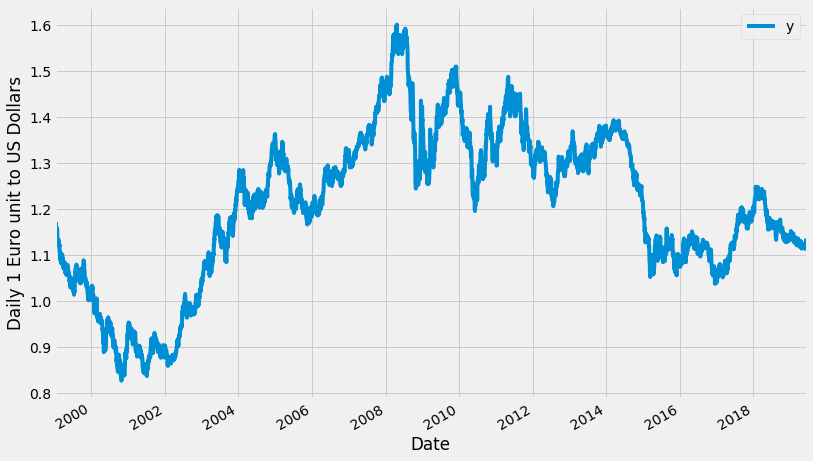

In [53]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily 1 Euro unit to US Dollars')
ax.set_xlabel('Date')

plt.show()

In [54]:
# instantiate a new Prophet object by setting the set the uncertainty interval to 95% because default is 80%
my_model = Prophet(interval_width=0.95)

In [55]:
my_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
# future dataframe
future_dates = my_model.make_future_dataframe(periods=30, freq='d')
future_dates.tail()

,ds
5160,2019-07-10
5161,2019-07-11
5162,2019-07-12
5163,2019-07-13
5164,2019-07-14


In [57]:
# after the future dates you can use the predict method of the fitted model
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5160,2019-07-10,1.172217,1.088644,1.249865
5161,2019-07-11,1.172433,1.094498,1.251395
5162,2019-07-12,1.172721,1.095513,1.253665
5163,2019-07-13,1.197314,1.125366,1.270267
5164,2019-07-14,1.197702,1.114696,1.275930


The yhat are the values forecasted to represent the predicted values of a particular set of y values . . . with lower bound yhat_lower and upper bound yhat_upper

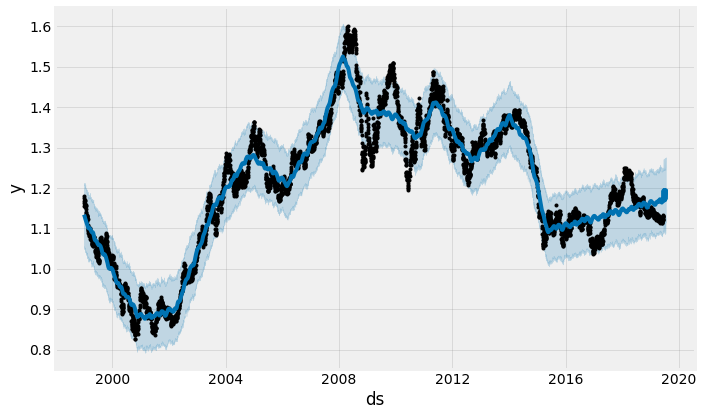

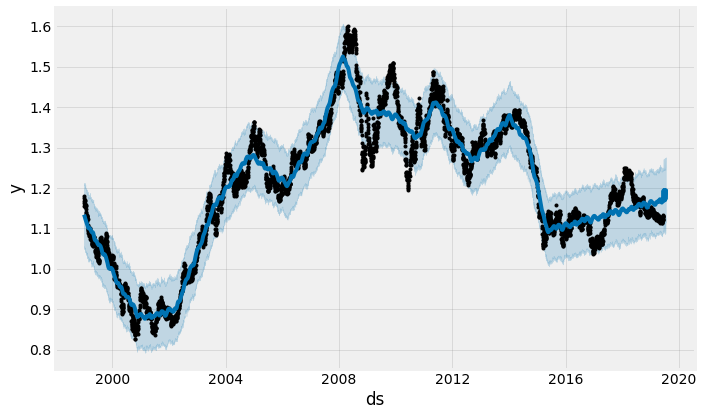

In [58]:
# plot future results
my_model.plot(forecast,
              uncertainty=True)

The black dots are the observed values in the time series, the blue line is the forecasted values and the blue shaded regions are the uncertainty intervals of our forecasts.

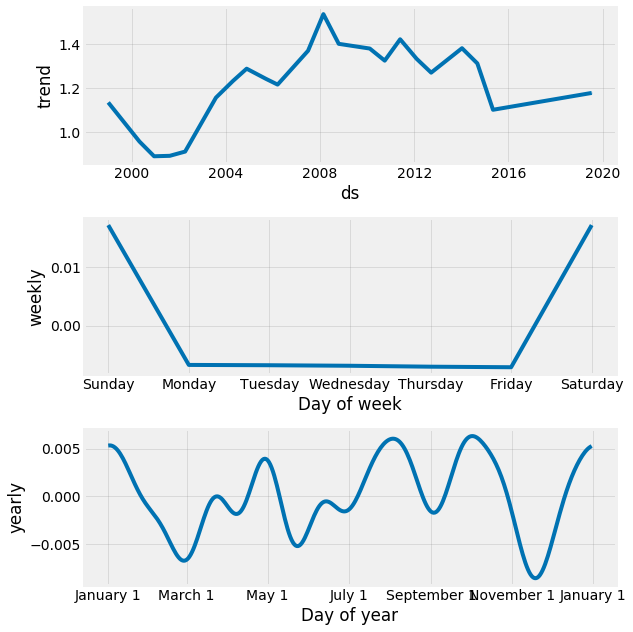

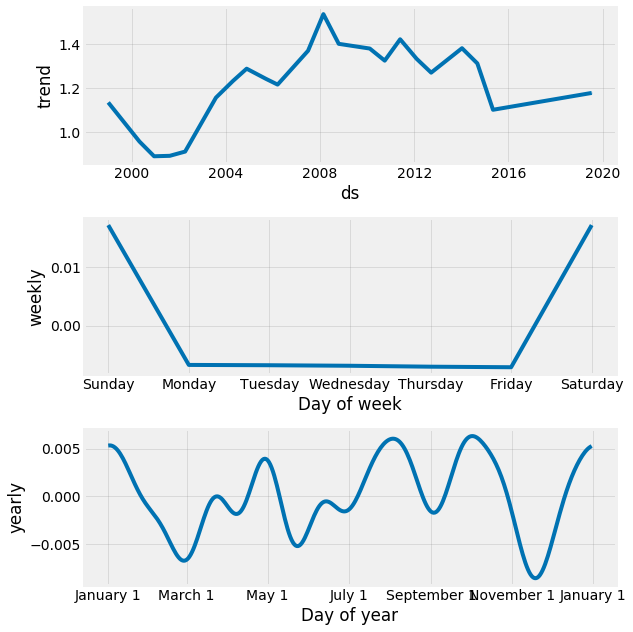

In [59]:
# return the components of our forecasts to view the contribution of daily, weekly and yearly patterns to the forecast
my_model.plot_components(forecast)

There is a peak in 2008 and a valley in 2001 in a global manner with local peaks in 2005, 2011 and 2014 and local valleys in 2006 and 2015.  Also, there is no day in the week that can explain a trend, but the November month is the  lowest in volume and the highest volume is around the New Year's Day, August and October.